In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)

# Data Loading & Preprocessing:

    1. Loading the dataset and resizing it to 224 size image as Resnet-34 use this size input image, and then Transform into Tensors:

In [2]:
from torchvision import datasets, transforms
dataset_path=datasets.ImageFolder(root='fruits360/Training/', transform=transforms.Compose([transforms.Resize(224),transforms.ToTensor()]))

    2. Spliting the dataset Into Train and Test:
    
        Spliting the Dataset into 80% training and 20% testing dataset, and shuffling the dataset to distribute the train 
        and test into random examples 
        

In [3]:
from torch.utils.data.sampler import SubsetRandomSampler

split = int(0.8 * len(dataset_path))
index_list = list(range(len(dataset_path)))
np.random.shuffle(index_list)
train_idx, test_idx = index_list[:split], index_list[split:] ## Traing and testing indexes.


## create sampler objects using SubsetRandomSampler
tr_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)
## create iterator objects for train and test datasets
train_loader = torch.utils.data.DataLoader(dataset_path, batch_size=32, sampler=tr_sampler)
test_loader = torch.utils.data.DataLoader(dataset_path, batch_size=32, sampler=test_sampler)

print ("Total Number of Examples: ",len(dataset_path))
print ("Number of training Examples: ",len(tr_sampler))
print ("Number of testing Examples: ",len(test_sampler))

Total Number of Examples:  8147
Number of training Examples:  6517
Number of testing Examples:  1630


In [4]:
Classes_num=len(train_loader.dataset.classes)
print ('Number of Classes',Classes_num)
print('Classes Name: ', train_loader.dataset.classes)

Number of Classes 15
Classes Name:  ['Rambutan', 'Raspberry', 'Redcurrant', 'Salak', 'Strawberry', 'Strawberry Wedge', 'Tamarillo', 'Tangelo', 'Tomato 1', 'Tomato 2', 'Tomato 3', 'Tomato 4', 'Tomato Cherry Red', 'Tomato Maroon', 'Walnut']


Example: 


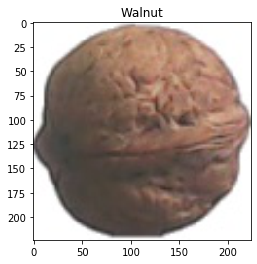

In [5]:
print ('Example: ')
i1, l1 = next(iter(train_loader))
plt.title(train_loader.dataset.classes[l1[0]])
plt.imshow(np.array(i1[0].permute(1, 2, 0)));

# Convolutional Neural Network (Resnet-34)

Deep Learning help us to solve complex problems, as a general method the more complex problem the more deep network we will make. But there are some problem with Deep networks is vanishing gradient, when the network is too deep, the gradients from where the loss function is calculated easily shrink to zero after several applications of the chain rule. This result on the weights never updating its values and therefore, no learning is being performed.

Resnet use new architecture in CNN where It add previous information to upcomming next layer by a new path, With ResNets, the gradients can flow directly through the skip connections backwards from later layers to initial filters.


Since ResNets can have variable sizes, depending on how big each of the layers of the model are, and how many layers it has, we will use the Resnet-34 as described by the authors in the [paper ResNet 34](https://arxiv.org/abs/1512.03385) .

![Resnet-34 Architecture](resnet-34.png)

For more details kindly check this [article](https://towardsdatascience.com/understanding-and-visualizing-resnets-442284831be8)

We will import already made Resnet34 models from torch vision library.

In [5]:
import torchvision.models as models
model = models.resnet34(num_classes=Classes_num)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

Define the loss function and the optimizer using the nn and optim package:

In [6]:
import torch.optim as optim
import torch.nn as nn
# create a loss function
criterion = nn.CrossEntropyLoss()
# create a stochastic gradient descent optimizer
optimizer = optim.Adam(model.parameters(), lr=0.00001)

# Model Training

We are now ready to train the model. The core steps are Forward Propagation, Loss Computation, Backpropagation, and updating the parameters.

Note: Because of deep structure of resnet it takes quit more time for training and testing.


In [ ]:
# run the main training loop
loss_array=[]
epochs=10
for epoch in range(1,epochs):
    
    for batch_idx, (data, target) in enumerate(train_loader):
        
        data, target = Variable(data), Variable(target)
        
        #In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch
        optimizer.zero_grad()## accumulates the gradients on subsequent backward passes.
        
        
        ## 1. forward propagation
        model_out = model(data)
        
        ## 2. loss calculation
        loss = criterion(model_out, target)
        
        ## 3. backward propagation
        loss.backward()
        
        ## 4. weight optimization
        optimizer.step()
        
        loss_array.append(loss.item())
        
        if batch_idx % len(train_loader)-1 == 0:
            
            print('Epoch: ',epoch,'Loss: ', loss.item())

Epoch:  1 Loss:  2.8117876052856445
Epoch:  2 Loss:  0.23809483647346497
Epoch:  3 Loss:  0.06720347702503204
Epoch:  4 Loss:  0.012082844972610474
Epoch:  5 Loss:  0.007344499230384827
Epoch:  6 Loss:  0.0017729699611663818
Epoch:  7 Loss:  0.0019745826721191406
Epoch:  8 Loss:  0.0022191107273101807


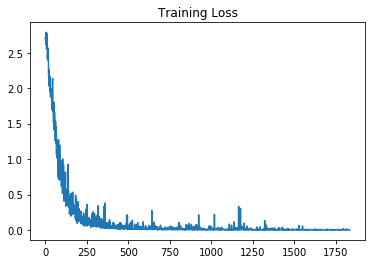

In [10]:
%matplotlib inline
plt.plot(loss_array)
plt.title("Training Loss")
plt.show()

# Model Testing

Once the model is trained, Lets test it on test dataset.

    1. Testing on some example

In [11]:
## dataloader for test dataset 
dataiter = iter(test_loader)
data, labels = dataiter.next()
data, target = Variable(data), Variable(target)


output = model(data)
_, preds_tensor = torch.max(output, 1)
preds_tensor=preds_tensor.cpu()
preds = np.squeeze(preds_tensor.numpy())
print ("Actual:   ", np.array(labels[:10]))
print ("Predicted:", preds[:10])

Actual:    [ 1 11  2  5  8  5 12  2  2  8]
Predicted: [ 1 11  2  5  8  5 12  2  2  8]


    2. Checking Accuracy of Model

In [14]:
# run a test loop
test_loss = 0
correct = 0
for data, target in test_loader:
    data, target = Variable(data), Variable(target)
    
    model_out = model(data)
    # sum up batch loss
    
    test_loss += criterion(model_out, target).item()
    pred = model_out.data.max(1)[1]  # get the index of the max log-probability
    correct += pred.eq(target.data).sum()

test_loss /= len(test_loader.dataset)

print('Average loss: ',test_loss)
print('Accuracy: ',np.array(100. * correct / len(test_sampler)),'%')
print ('Total Test Examples: ',len(test_sampler))
print ('Correct predicted Examples: ',int(correct))


Average loss:  2.177578889620466e-05
Accuracy:  100 %
Total Test Examples:  1630
Correct predicted Examples:  1630
